In [5]:
import S4
import ff
import numpy as np

L=1
n=5
depth = 0.473
wls = np.linspace(.35, 3, 2651)
i_wl = 502
p = 0
wl = wls[i_wl]
i=.7

for j in range(1,4):
    S = S4.New(Lattice=L, NumBasis=n)
    S.SetMaterial(Name='W',   Epsilon=(ff.w_n[i_wl+p+130]**2-1)+1)
    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl+p+130]**2-1)*i+1)


    S.AddLayer(Name='VacuumAbove', Thickness=0.5, Material='Vac')
    S.AddLayer(Name='Grating',      Thickness=depth, Material='Vac')
    S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/4, L/2), Angle = 0)
    S.AddLayer(Name='VacuumBelow', Thickness=1, Material='W')
    # S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    if j == 1 or j == 3:
        excitations.append((1, b'y', 1))
    if j > 1:
        excitations.append((2, b'y', 1))

    # excitations.append((4, b'y', 1))
    S.SetExcitationExterior(tuple(excitations))
    (_, back) = S.GetPowerFlux('VacuumAbove', zOffset=0)
    # z_space = np.linspace(0, 0.5 + depth + 1, 100)
    # x_space = np.linspace(0, 1, 50)
    # e = np.zeros((z_space.size, x_space.size), complex)
    # for zi, z in enumerate(z_space):
    #     for xi, x in enumerate(x_space):
    #         e[zi, xi] = S.GetFields(x, 0, z)[0][1]
    # im = plt.imshow(np.abs(e), extent=(x_space.min(), x_space.max(), z_space.max(), z_space.min()), aspect='auto', cmap='viridis')
    # plt.colorbar(im, label = '|e| mag')
    # plt.show()
    print(j)
    print(back)
    (forw_amp, back_amp) = S.GetAmplitudes('VacuumAbove', zOffset=0)
    print(back_amp)
    if j == 1:
        e1 = np.array(back_amp)
    elif j == 2:
        e2 = np.array(back_amp)
    elif j == 3:
        es = np.array(back_amp)
# def compute_ab_complex_lstsq(e1: np.ndarray, e2: np.ndarray, es: np.ndarray) -> tuple[complex, complex]:
#     # Build (M × 2) design matrix with complex entries
#     A = np.vstack([e1, e2]).T            # shape (M, 2), dtype=complex
#     # lstsq handles complex types correctly
#     (a, b), *_ = np.linalg.lstsq(A, es, rcond=None)  # :contentReference[oaicite:1]{index=1}
#     return a, b
# compute_ab(e1, e2, es)
# print(np.sum(np.abs(e1+e2-es)))

1
(-0.5191457312502916-5.551115123125783e-17j)
((-0.1760967155347666-0.6945319617990929j), (-0.016080735418346915-0.03534799078752405j), (-0.01608073541834699-0.035347990787524174j), (-0.00029584183533183764-0.00017190071157613732j), (-0.0002958418353318374-0.0001719007115761369j), 0j, 0j, 0j, 0j, 0j)
2
(-0.8653916034833129+2.7755575615628914e-17j)
((-0.030715285575820768-0.0675170384515831j), (0.4284858174297715+0.1737487537578293j), (0.09264967290720455+0.4773001793289035j), (0.0008561943677683322+0.0026533735167078736j), (-0.0012857658936512284-0.0011241802499754436j), 0j, 0j, 0j, 0j, 0j)
3
(-1.3692130963711697-2.7755575615628914e-17j)
((-0.20681200111058737-0.762049000250676j), (0.41240508201142456+0.13840076297030526j), (0.07656893748885757+0.44195218854137935j), (0.0005603525324364946+0.0024814728051317366j), (-0.0015816077289830658-0.0012960809615515806j), 0j, 0j, 0j, 0j, 0j)


# Hacky solution

In [30]:
import S4
import numpy as np
import ff

ang_pol = 0
N = 9
vac_depth = 0
depth = 0.473
L=1
i_wl = 0
wl = np.linspace(.35, 3, 2651)[i_wl]

S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

S.SetMaterial(Name='Vac', Epsilon=1)
S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/16, L/2), Angle = 0)

S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
S.SetFrequency(1.0 / wl)
S.SetExcitationPlanewave((0, 0), sAmplitude=np.cos(ang_pol * np.pi/180), pAmplitude=np.sin(ang_pol * np.pi/180), Order = 0)
forw, back = S.GetPowerFlux('VacuumAbove', zOffset=0)
print(f'Correct back: {back}')
(forw_amp, back_amp) = S.GetAmplitudes('VacuumAbove', zOffset=0)
# print('Back amplitudes:')
# for i in back_amp:
#     print(i)
basis = S.GetBasisSet()
print("Basis")
print(basis)

for i in range(0, 20):
    # basis_i = basis[i-1]
    S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
    S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

    S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
    S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
    S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/16, L/2), Angle = 0)

    S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    pc = 1 / np.sqrt(2)
    # 90 degree is x, 0 degree is y
    excitations.append((i, b'y', 1))
    # excitations.append((i, b'x', 1))
    S.SetExcitationExterior(tuple(excitations))

    forw, back = S.GetPowerFlux('VacuumAbove', zOffset=0)
    print(i, back)

Correct back: (-0.4592292853198847+0j)
Basis
((0, 0), (0, -1), (-1, 0), (1, 0), (0, 1), (1, 1), (-1, 1), (-1, -1), (1, -1))
0 0j
1 (-0.4592292853198847+0j)
2 (-0.43772682016497577-3.469446951953614e-18j)
3 (-0.4986305967336756+0j)
4 (-0.4986305967336758+0j)
5 (-0.43772682016455927-3.469446951953614e-18j)
6 (-0.4720531237396613+0j)
7 (-0.4720531237396006+0j)
8 (-0.47205312373972896+0j)
9 (-0.47205312373974384+0j)
10 (-0.4535504782358962-1.3877787807814457e-17j)
11 (-0.5388161660673045+0j)
12 (-0.4359932535434468+2.7755575615628914e-17j)
13 (-0.43599325354364826+2.7755575615628914e-17j)
14 (-0.5388161660678386+0j)
15 (-0.5023255807084184-6.938893903907228e-18j)
16 (-0.5023255807084195+0j)
17 (-0.5023255807093779-6.938893903907228e-18j)
18 (-0.502325580708311+0j)
19 (-1.7546268844891823e-43+0j)


In [25]:
import S4
import numpy as np
import ff

ang_pol = 0
N = 9
vac_depth = 0
depth = 0.473
L=1
i_wl = 0
wl = np.linspace(.35, 3, 2651)[i_wl]

S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

S.SetMaterial(Name='Vac', Epsilon=1)
S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/2, L/16), Angle = 0)

S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
S.SetFrequency(1.0 / wl)
S.SetExcitationPlanewave((0, 0), sAmplitude=np.cos(ang_pol * np.pi/180), pAmplitude=np.sin(ang_pol * np.pi/180), Order = 0)
forw, back = S.GetPowerFlux('VacuumAbove', zOffset=0)
print(f'Correct back: {back}')
(forw_amp, back_amp) = S.GetAmplitudes('VacuumAbove', zOffset=0)
# print('Back amplitudes:')
# for i in back_amp:
#     print(i)
basis = S.GetBasisSet()
print("Basis")
print(basis)

for i in range(0, 20):
    # basis_i = basis[i-1]
    S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
    S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

    S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
    S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
    S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/2, L/16), Angle = 0)

    S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    pc = 1 / np.sqrt(2)
    excitations.append((i, b'y', 1))
    # excitations.append((i, b'x', 1))
    S.SetExcitationExterior(tuple(excitations))

    forw, back = S.GetPowerFlux('VacuumAbove', zOffset=0)
    print(i, back)

Correct back: (-0.4535504782359141+0j)
Basis
((0, 0), (0, -1), (-1, 0), (1, 0), (0, 1), (1, 1), (-1, 1), (-1, -1), (1, -1))
0 0j
1 (-0.4535504782359141+0j)
2 (-0.4359932535434796+0j)
3 (-0.5388161660680164+0j)
4 (-0.5388161660696836+0j)
5 (-0.43599325354353446+0j)
6 (-0.502325580708143+0j)
7 (-0.5023255807082398-6.938893903907228e-18j)
8 (-0.5023255807089627+0j)
9 (-0.5023255807075109-6.938893903907228e-18j)
10 (-0.4592292853198841-1.3877787807814457e-17j)
11 (-0.49863059673367455+0j)
12 (-0.43772682016459336-3.469446951953614e-18j)
13 (-0.43772682016086467-3.469446951953614e-18j)
14 (-0.49863059673367366+0j)
15 (-0.4720531237358564+0j)
16 (-0.4720531237398591+0j)
17 (-0.47205312373956665+0j)
18 (-0.4720531237407739+0j)
19 (-1.6766287122884448e-43+0j)


In [151]:
import S4
import numpy as np
import ff

ang_pol = 45
N = 9
vac_depth = 0
depth = 0.473
L=1
i_wl = 0
wl = np.linspace(.35, 3, 2651)[i_wl]

for i in range(0, 20):
    # basis_i = basis[i-1]
    S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
    S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

    S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
    S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
    # S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/2, L/4), Angle = 0)

    # S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    pc = 1 / np.sqrt(2)
    # excitations.append((i, b'y', 1))
    excitations.append((i, b'x', 1))
    S.SetExcitationExterior(tuple(excitations))
    # S.SetExcitationPlanewave((0, 0), sAmplitude=np.cos(ang_pol * np.pi/180), pAmplitude=np.sin(ang_pol * np.pi/180), Order = 6)


    forw, back = S.GetPowerFlux('Grating', zOffset=0)
    print(i, forw)

0 0j
1 (1+0j)
2 (1.0675210253672476+0j)
3 (0.9367496997597596+0j)
4 (0.9367496997597596+0j)
5 (1.0675210253672476+0j)
6 (1.009889017573005+0j)
7 (1.009889017573005+0j)
8 (1.009889017573005+0j)
9 (1.009889017573005+0j)
10 0j
11 0j
12 0j
13 0j
14 0j
15 (6.476707133772738e-33-1.5140731815630385e-33j)
16 (6.476707133772738e-33-1.5140731815630385e-33j)
17 (6.476707133772738e-33-1.5140731815630385e-33j)
18 (6.476707133772738e-33-1.5140731815630385e-33j)
19 0j


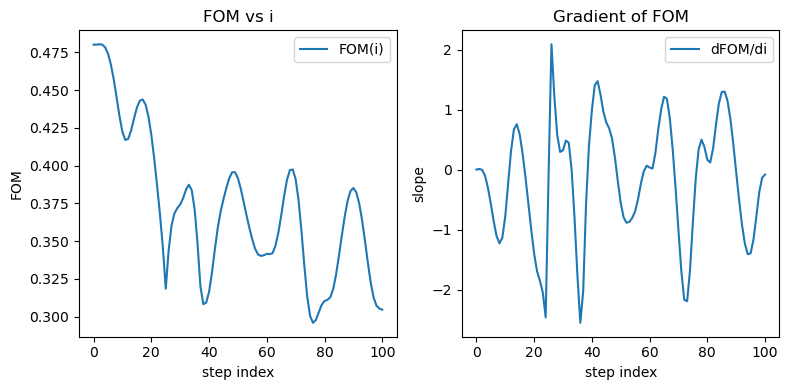

In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import S4
from tqdm import tqdm
import ff
n=7
def gradient_per_image(grating: torch.Tensor, L: float, ang_pol: float, i):
    p = 1480
    p = 20
    n_grating_elements = grating.shape[-1]
    x_density = 5
    n_x_pts = x_density * n_grating_elements
    depth = 0.9
    z_buff = 0.15
    z_space = np.linspace(0, 0.5 + depth + 1, 10)
    z_meas = z_space[(z_space >= 0.5) & (z_space <= 0.5 + depth)]
    wavelengths = torch.linspace(0.35, 3.0, 2651)

    def make_grid(L, n_cells, k):
        dx = L / n_cells
        fr = np.arange(1, 2*k, 2) / (2*k)
        st = np.arange(n_cells)[:, None]
        return ((st + fr) * dx).ravel()
    x_meas = make_grid(L, n_cells=x_density, k=n_grating_elements)

    dflux = torch.zeros((2, n_x_pts))
    power = []

    for i_wl, wl in enumerate(wavelengths[p:p+1]):
        # S = S4.New(Lattice=L, NumBasis=n)
        S = S4.New(Lattice=((L, 0), (0, L)), NumBasis=n**2)
        S.SetMaterial(Name='W',   Epsilon=(ff.w_n[i_wl+p+130]**2-1)+1)
        S.SetMaterial(Name='Vac', Epsilon=1)
        # S.SetMaterial(Name='AlN', Epsilon=(ff.cao_n[i_wl+p]**2-1)*i+1)
        S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl+p+130]**2-1)*i+1)


        S.AddLayer(Name='VacuumAbove', Thickness=0.5, Material='Vac')
        S.AddLayer(Name='Grating',      Thickness=depth, Material='Vac')
        S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/4, L/4), Angle = 0)
        S.AddLayer(Name='VacuumBelow', Thickness=1, Material='W')
        # S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
        S.SetFrequency(1.0 / wl)

        S_adj = S.Clone()
        S.SetExcitationPlanewave((0,0), sAmplitude=np.cos(ang_pol*np.pi/180), pAmplitude=np.sin(ang_pol*np.pi/180), Order=0)
        # excitations = []
        # excitations.append((2, b'y', 1))
        # S.SetExcitationExterior(tuple(excitations))
        (_, back) = S.GetPowerFlux('VacuumAbove', zOffset=0)
        power.append(np.abs(back))

        
    # print(power[0])
    return power[0]
step = 0.01
x_vals = []
for i in np.arange(0, 1 + step, step):
    x_vals.append(gradient_per_image(torch.zeros(20), L = 1., ang_pol = 0, i=i))
x = np.array(x_vals)
slopes = np.gradient(x, step)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x, label="FOM(i)")
plt.title("FOM vs i")
plt.xlabel("step index")
plt.ylabel("FOM")
plt.legend()

plt.subplot(1,2,2)
plt.plot(slopes, label="dFOM/di")
plt.title("Gradient of FOM")
plt.xlabel("step index")
plt.ylabel("slope")
plt.legend()
# np.save(f'slope{n}.npy', slopes)

plt.tight_layout()
plt.show()

# This tests the excitation operation in the 2D case: where all the forward modes are reversed and sent in the back, to see if we get unitary output back.

In [39]:
import S4
import numpy as np
import ff

ang_pol = 90
N = 5**2
vac_depth = 0
depth = 0.473
L=1
i_wl = 0
wl = np.linspace(.35, 3, 2651)[i_wl]

for i in range(0, 20):
    # basis_i = basis[i-1]
    S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
    S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

    S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
    S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
    S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/3, L/7), Angle = 0)

    S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    pc = 1 / np.sqrt(2)
    excitations.append((i, b'y', 1))
    excitations.append((i, b'x', 1))
    S.SetExcitationExterior(tuple(excitations))
    # S.SetExcitationPlanewave((0, 0), sAmplitude=np.cos(ang_pol * np.pi/180), pAmplitude=np.sin(ang_pol * np.pi/180), Order = 0)


    forw, back = S.GetPowerFlux('Grating', zOffset=0)
    print(i, forw)

0 0j
1 (0.4894872310822146+1.1102230246251565e-16j)
2 (0.4907955921639885+3.434752482434078e-16j)
3 (0.4941532717702309+1.1102230246251565e-16j)
4 (0.4941532717702012-2.7755575615628914e-16j)
5 (0.4907955921640228+1.249000902703301e-16j)
6 (0.43367655568698554+4.440892098500626e-16j)
7 (0.7820638858897664-2.7755575615628914e-16j)
8 (0.4336765556870306+1.0685896612017132e-15j)
9 (0.7820638858896053+4.163336342344337e-16j)
10 (0.8441881292206004+9.43689570931383e-16j)
11 (-0.34930663373472476+3.608224830031759e-16j)
12 (-0.34930663373470267+5.273559366969494e-16j)
13 (0.8441881292205944+8.326672684688674e-17j)
14 (0.24617006354487225-6.800116025829084e-16j)
15 (-0.05581858348696998-3.0531133177191805e-16j)
16 (-0.05581858348690788+3.885780586188048e-16j)
17 (-0.07307915349556957+4.3021142204224816e-16j)
18 (-0.07307915349555479+8.326672684688674e-16j)
19 (1.4133841495345634+5.551115123125783e-16j)
